In [14]:
import pandas as pd 
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
df = pd.read_csv("../data/clean/df_after_EDA.csv")
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [16]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes('number')


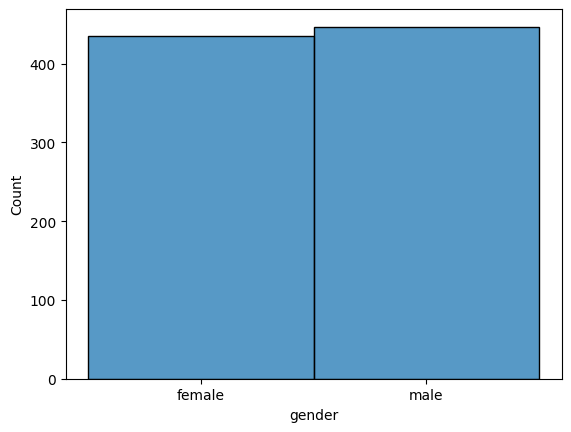

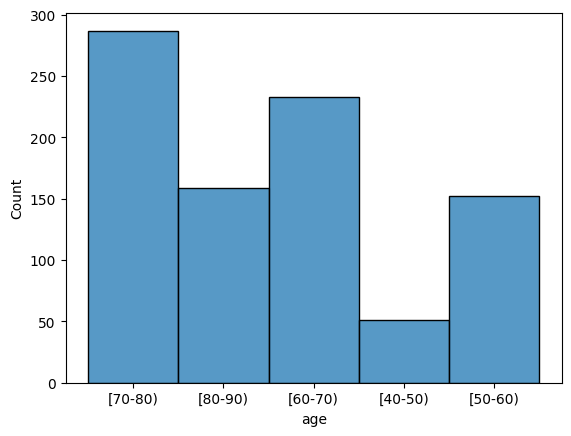

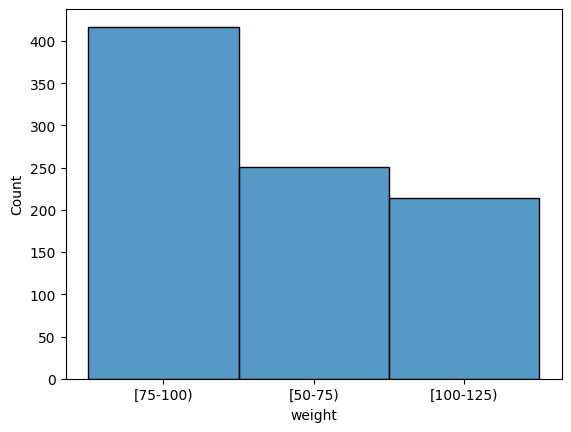

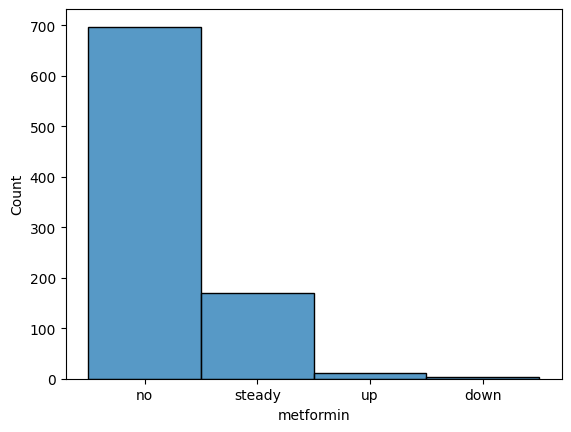

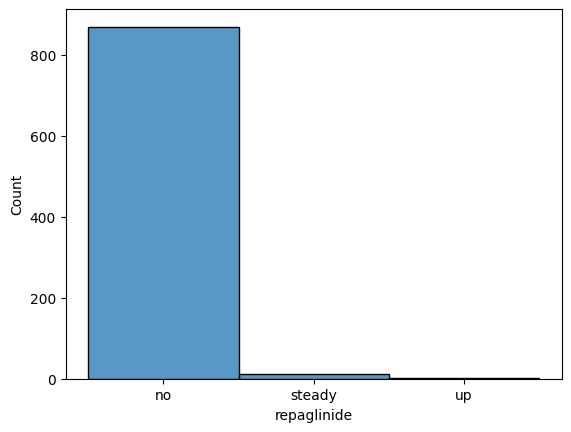

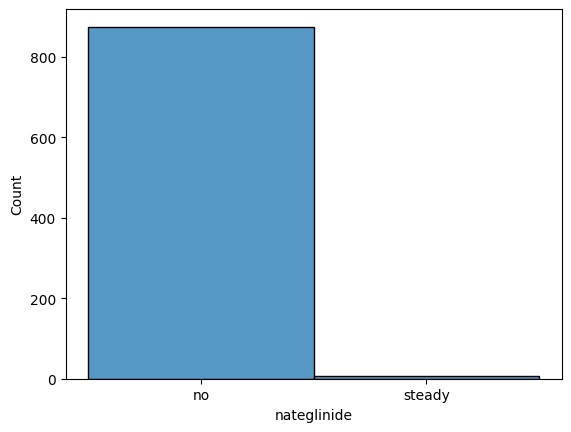

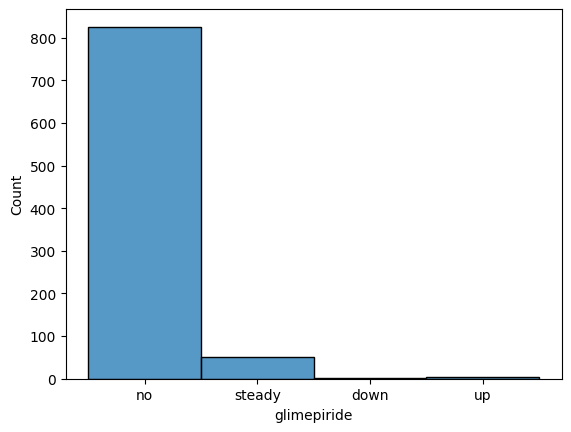

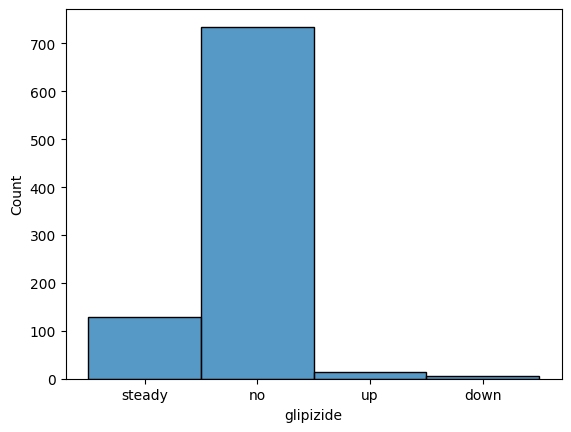

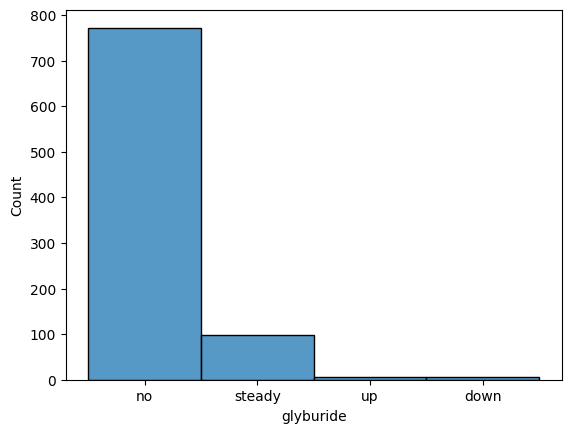

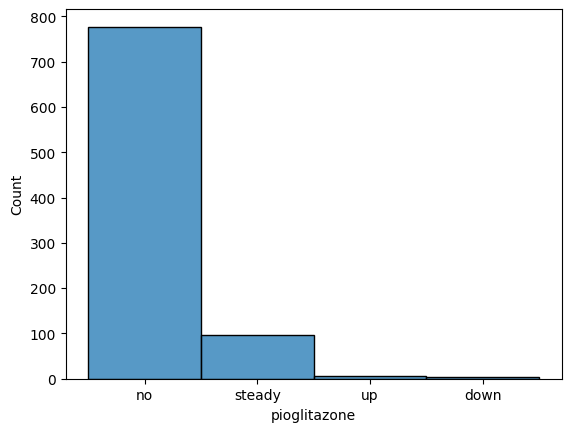

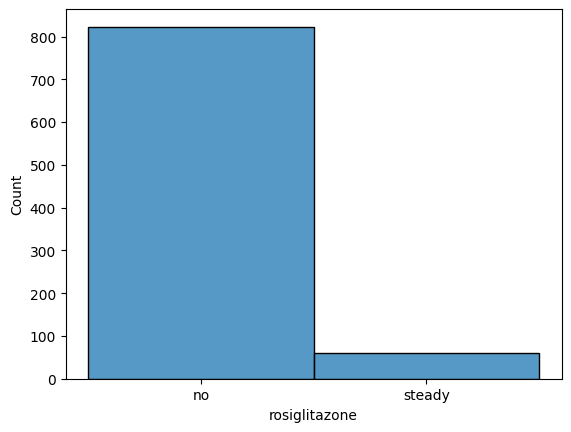

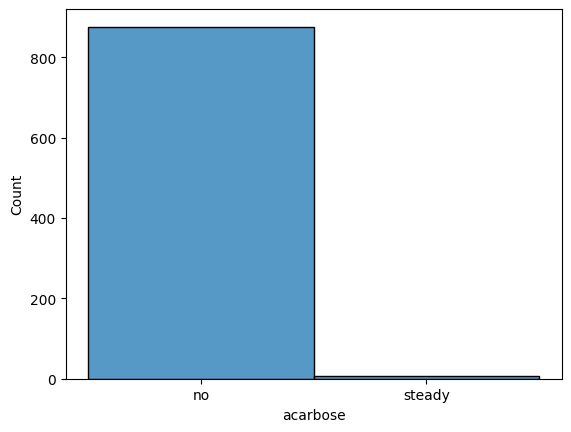

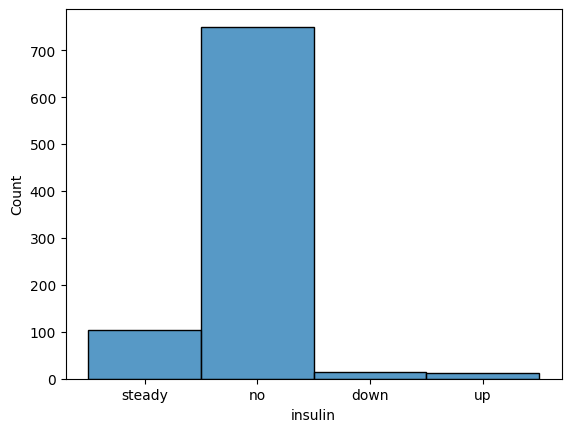

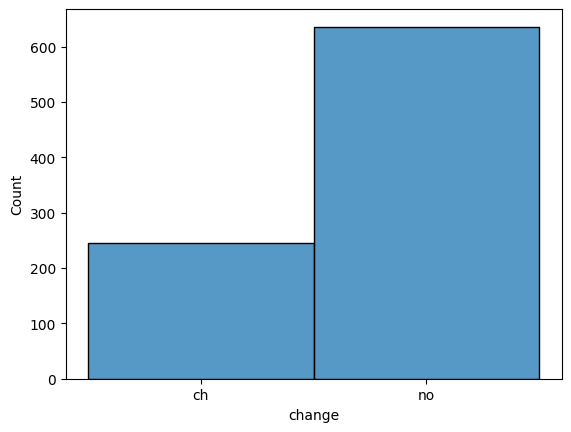

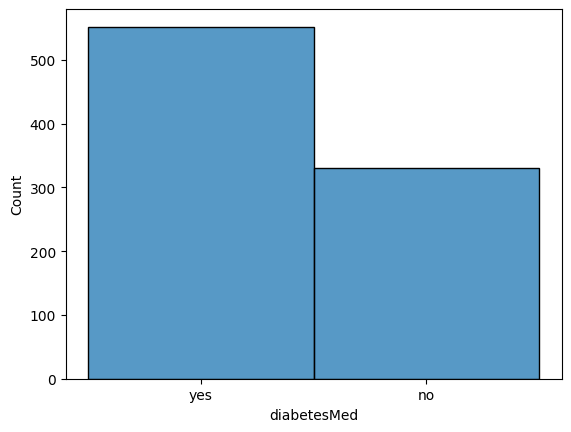

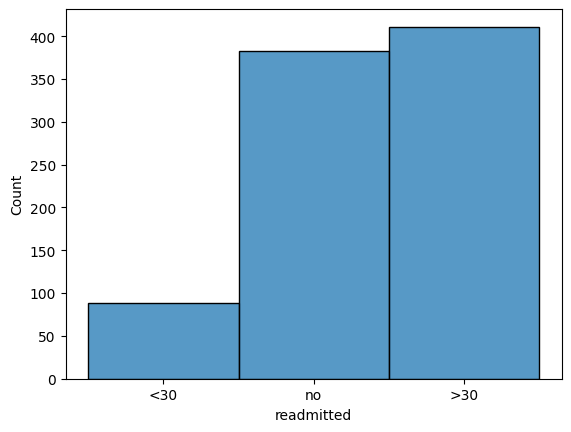

In [17]:
#plots histplots for each cat column 

for col in df_cat.columns:
    sns.histplot(data=df_cat, x=col)
    plt.show()

<Axes: >

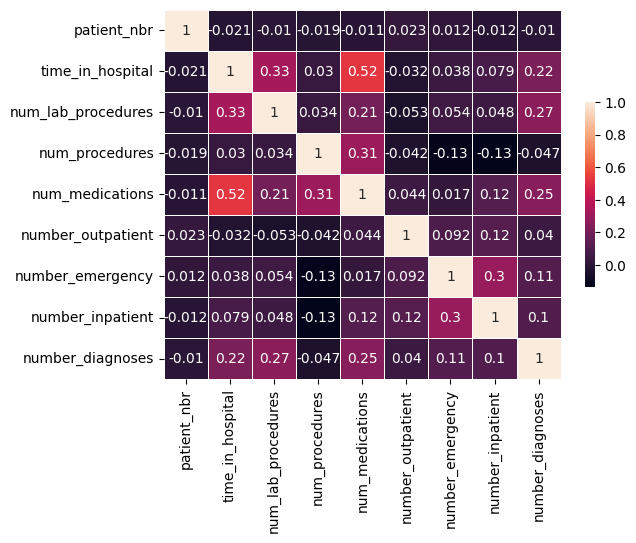

In [18]:
#checking correlations among numerical columns 

corr = df_num.corr()
sns.heatmap(corr,
            vmax=1,
            linewidth=.5,
            annot = corr,
            cbar_kws = {"shrink":.5}
           )

#seems like there are no multicollinear columns.

In [45]:
X = pd.get_dummies(df_cat)
X = X.replace({True:1,False:0})
X

/var/folders/q1/bq_b0f_d53ldgrm4rh3vh1_40000gn/T/ipykernel_20735/2448410612.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({True:1,False:0})


,gender_female,gender_male,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),weight_[100-125),weight_[50-75),weight_[75-100),...,insulin_no,insulin_steady,insulin_up,change_ch,change_no,diabetesMed_no,diabetesMed_yes,readmitted_<30,readmitted_>30,readmitted_no
0,1,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,1,0,0
1,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
2,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
3,0,1,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
4,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1
878,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,1
879,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
880,1,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


In [46]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

/Users/og/Desktop/IronHackDA/7-Final_Project/SugarSync/sugarsync/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 feature  VIF
0          gender_female  inf
1            gender_male  inf
2            age_[40-50)  inf
3            age_[50-60)  inf
4            age_[60-70)  inf
5            age_[70-80)  inf
6            age_[80-90)  inf
7       weight_[100-125)  inf
8         weight_[50-75)  inf
9        weight_[75-100)  inf
10        metformin_down  inf
11          metformin_no  inf
12      metformin_steady  inf
13          metformin_up  inf
14        repaglinide_no  inf
15    repaglinide_steady  inf
16        repaglinide_up  inf
17        nateglinide_no  inf
18    nateglinide_steady  inf
19      glimepiride_down  inf
20        glimepiride_no  inf
21    glimepiride_steady  inf
22        glimepiride_up  inf
23        glipizide_down  inf
24          glipizide_no  inf
25      glipizide_steady  inf
26          glipizide_up  inf
27        glyburide_down  inf
28          glyburide_no  inf
29      glyburide_steady  inf
30          glyburide_up  inf
31     pioglitazone_down  inf
32       p

## 1st Try with all data though distribution of target values are not equal

In [60]:
features = df.drop(['readmitted'],axis=1)
target = df[['readmitted']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=3)

In [62]:
# Split the dataset into numerical and categorical column
X_train_cat = X_train.select_dtypes('object')
X_test_cat  = X_test.select_dtypes('object')

X_train_num = X_train.select_dtypes('number')
X_test_num  = X_test.select_dtypes('number')

In [63]:
#Encoding. 


#Decided to use one hot encoding for weight and age  as 
#there's perhaps an ordinal relationship but not well/equally distributed

In [64]:
#first will change binary columns to 0s and 1

# OneHotEncoder with drop='if_binary'
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

# Identify categorical columns with 2 unique values
binary_cols = [col for col in X_train.columns if X_train[col].nunique() == 2 and X_train[col].dtype == 'object']

# Fit and transform the binary columns
X_train_encoded = X_train.copy()  # Copy the DataFrame to avoid modifying it directly
X_test_encoded = X_test.copy()  # Copy the DataFrame to avoid modifying it directly

# Encode train and test data separately
X_train_encoded[binary_cols] = encoder.fit_transform(X_train[binary_cols])
X_test_encoded[binary_cols] = encoder.transform(X_test[binary_cols])

In [70]:
#using OneHotEncoding for non-binary object columns 

non_binary_cols = [col for col in X_train_encoded.columns if X_train_encoded[col].nunique() > 2 and X_train_encoded[col].dtype == 'object']
non_binary_cols

[]

In [66]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the non-binary object columns for X_train_encoded
X_train_encoded_non_binary = encoder.fit_transform(X_train_encoded[non_binary_cols])

# Transform the non-binary object columns for X_test_encoded
X_test_encoded_non_binary = encoder.transform(X_test_encoded[non_binary_cols])

# Get the names of the new columns created by OneHotEncoder
new_columns = encoder.get_feature_names_out(input_features=non_binary_cols)

# Create DataFrames for the encoded non-binary object columns
X_train_encoded_non_binary_df = pd.DataFrame(X_train_encoded_non_binary, columns=new_columns, index=X_train_encoded.index)
X_test_encoded_non_binary_df = pd.DataFrame(X_test_encoded_non_binary, columns=new_columns, index=X_test_encoded.index)

# Concatenate the encoded non-binary object columns with the original DataFrames
X_train_encoded = pd.concat([X_train_encoded.drop(columns=non_binary_cols), X_train_encoded_non_binary_df], axis=1)
X_test_encoded = pd.concat([X_test_encoded.drop(columns=non_binary_cols), X_test_encoded_non_binary_df], axis=1)

In [67]:
X_test.shape

(209, 24)

In [68]:
X_test_encoded.shape

(209, 62)

In [17]:
X_test_encoded.nunique()

gender                 2
time_in_hospital      13
num_lab_procedures    67
num_procedures         7
num_medications       31
                      ..
pioglitazone_up        2
insulin_down           2
insulin_no             2
insulin_steady         2
insulin_up             2
Length: 62, dtype: int64

In [18]:
X_train_encoded.select_dtypes('object').nunique()

Series([], dtype: float64)

In [19]:
normalizer = MinMaxScaler()
normalizer.fit(X_train_encoded)

MinMaxScaler()

In [20]:
X_train_norm_np = normalizer.transform(X_train_encoded)
X_test_norm_np = normalizer.transform(X_test_encoded)

In [21]:
X_train_norm_df = pd.DataFrame(X_train_norm_np, columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_norm_df  = pd.DataFrame(X_test_norm_np,  columns=X_test_encoded.columns,  index=X_test_encoded.index)

In [22]:
knn = KNeighborsClassifier(n_neighbors=12)  
knn.fit(X_train_norm_df, y_train)
# Save the model with pickle

/Users/og/Desktop/IronHackDA/7-Final_Project/SugarSync/sugarsync/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=12)

In [23]:
y_pred = knn.predict(X_test_norm_df)

In [24]:
accuracy = knn.score(X_test_norm_df, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.4688995215311005


### 2nd

In [25]:
df['readmitted'].value_counts()

readmitted
>30    478
no     465
<30    100
Name: count, dtype: int64

In [40]:
df.nunique()

race                   4
gender                 2
age                   10
weight                 8
time_in_hospital      14
num_lab_procedures    89
num_procedures         7
num_medications       46
number_outpatient     15
number_emergency       8
number_inpatient      10
number_diagnoses       7
metformin              4
repaglinide            3
nateglinide            2
glimepiride            4
glipizide              4
glyburide              4
pioglitazone           4
rosiglitazone          2
acarbose               2
insulin                4
change                 2
diabetesMed            2
readmitted             3
dtype: int64

In [26]:
# Define the number of samples you want for each value of the 'readmitted' column
num_samples_per_group = 100

# Group the DataFrame by the 'readmitted' column and sample equally from each group
sampled_df = df.groupby('readmitted', group_keys=False).apply(lambda x: x.sample(min(len(x), num_samples_per_group)))

# Reset the index of the sampled DataFrame
sampled_df.reset_index(drop=True, inplace=True)

/var/folders/q1/bq_b0f_d53ldgrm4rh3vh1_40000gn/T/ipykernel_7598/500953935.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('readmitted', group_keys=False).apply(lambda x: x.sample(min(len(x), num_samples_per_group)))
